<a href="https://colab.research.google.com/github/sarathkumar271002/Complete_DL_project---MRI-Based-Brain-Tumor-Recognition/blob/main/MRI_Based_Brain_Tumor_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT_DIR = "/content/drive/MyDrive/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Brain Tumor', 2558), ('Healthy', 2121)])

# Splitting the data such that

* 70% for Train data
* 15% for Validation
* 15% for Evaluation

In [ ]:
def datafolder(p, split):
  # Creating Training folder

  if not os.path.exists('./'+p):
    os.mkdir('./'+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs('./'+p+'/'+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir) ),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join('./'+p, dir)
        shutil.copy(O,D)
        # os.remove(O) -> this code will delete our original dataset files from Drive
  else:
    print(f'{p}folder exist')

In [ ]:
datafolder('train', 0.7)  #Splitting 70% data for Training

In [ ]:
ROOT_DIR = "/content/train"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Healthy', 1479), ('Brain Tumor', 1785)])

In [ ]:
datafolder('val', 0.50)   #Splitting 15% data for Validation

valfolder exist


In [ ]:
ROOT_DIR = "/content/val"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Healthy', 216), ('Brain Tumor', 262)])

In [ ]:
datafolder('test',0.15)   #Splitting 15% data for Testing

testfolder exist


In [ ]:
ROOT_DIR = "/content/test"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Healthy', 0)])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    './train',              # training images folder
    target_size=(224, 224),  # resize
    batch_size=32,
    class_mode='categorical' # type of labels
)

Found 3264 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

# Model Buiding

In [ ]:
pip install keras

In [ ]:
import keras
print(keras.__version__)

3.11.2


In [ ]:
pip install --upgrade keras tensorflow

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
# CNN Model

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),activation = 'relu',input_shape =(224,224,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))

# Flatten before passing to Dense layers
model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,635,361 (21.50 MB)

 Trainable params: 5,635,361 (21.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

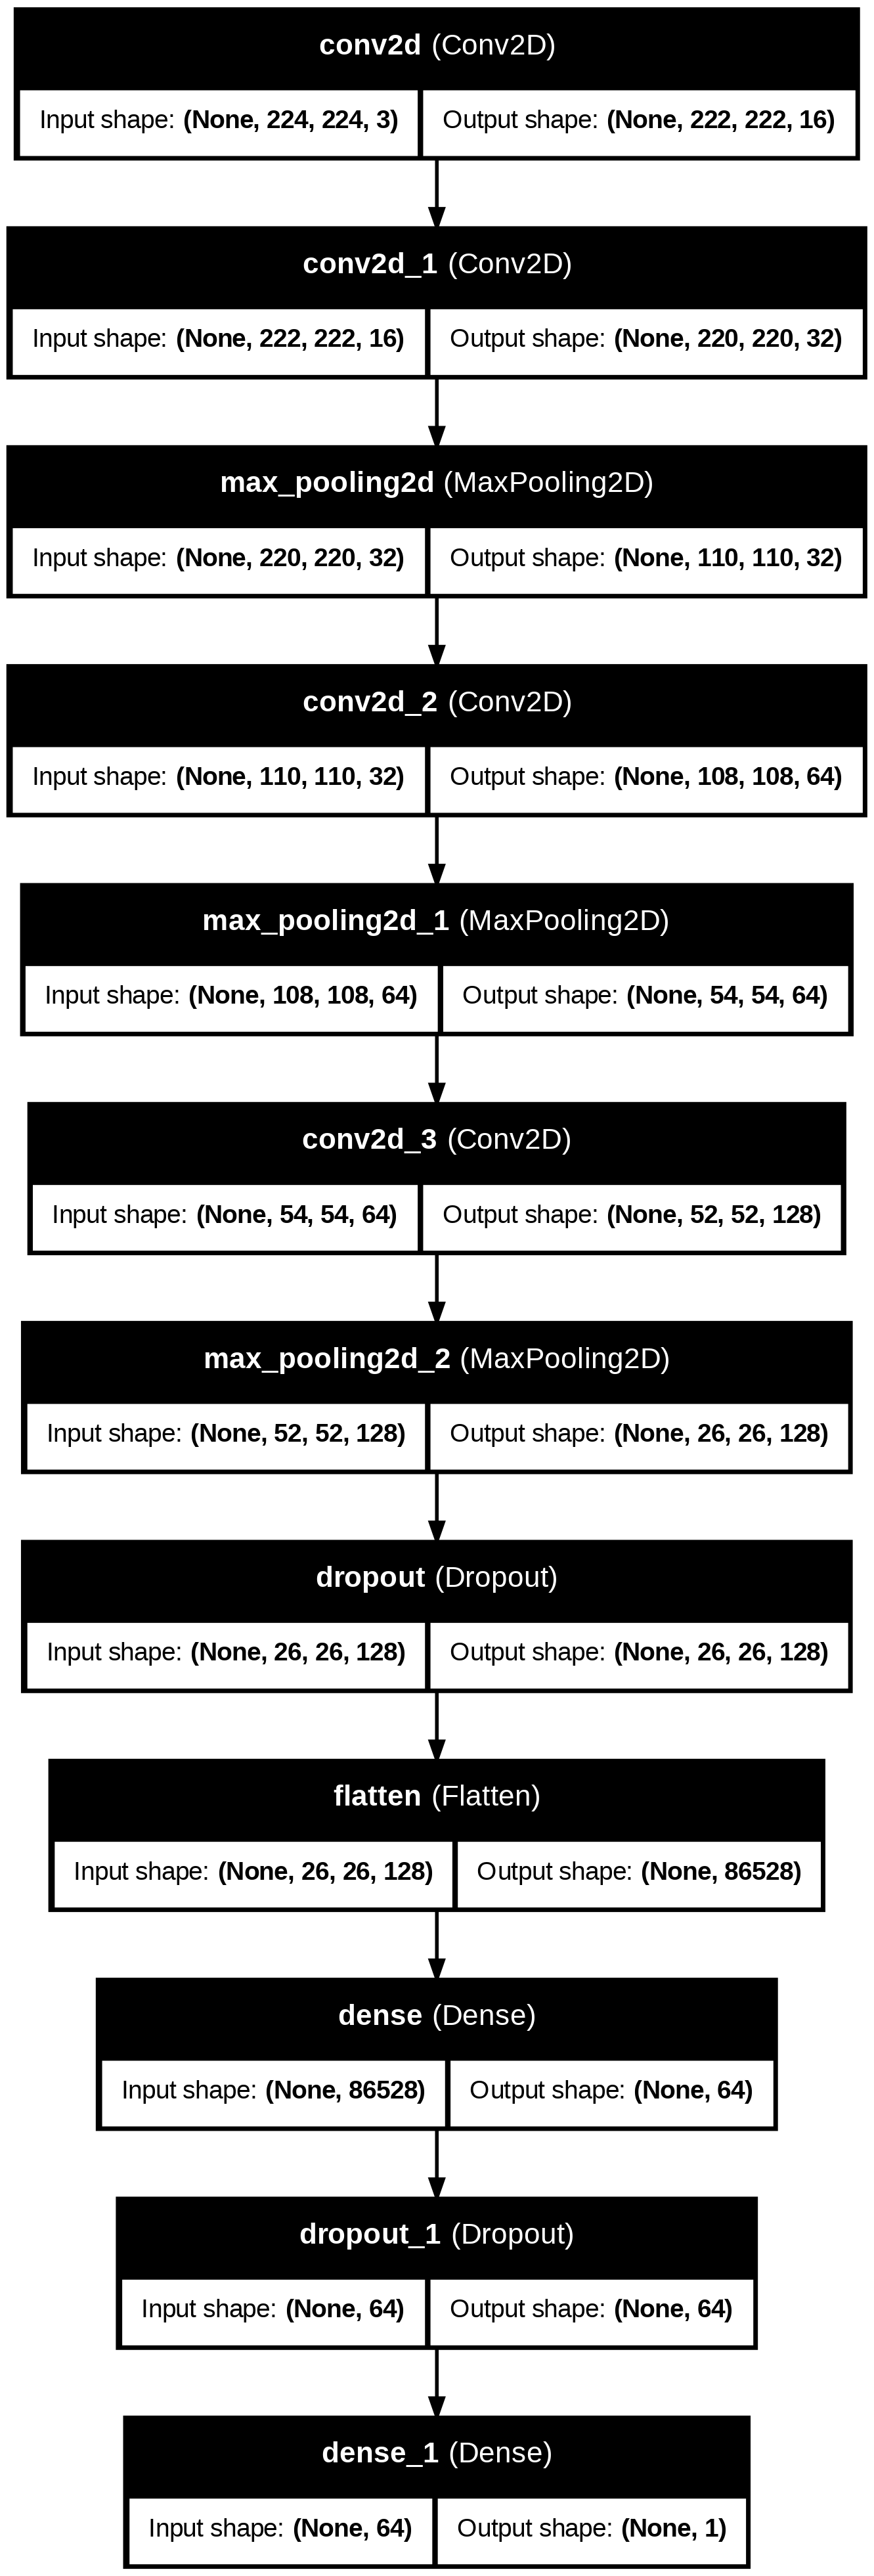

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Preparing our data using Data Generator

In [ ]:
def preprocessingImages(path): # Data Augmentation
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range= 0.2, rescale = 1/255, horizontal_flip = True) # Increasing dimension for deep pattern
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = '/content/train'
train_data = preprocessingImages(path)

Found 3264 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(rescale=1/255 )
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = '/content/val'
val_data = preprocessingImages2(path)

Found 478 images belonging to 2 classes.


In [ ]:
path = '/content/test'
test_data = preprocessingImages2(path)

Found 0 images belonging to 1 classes.


In [ ]:
# Early stopping and model check point
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose =1, mode = 'auto')

# Model Checkpoint
#mc = ModelCheckpoint(monitor = 'val_accuracy', filepath='./bestmodel.h5', verbose =1, save_best_only = 'True', mode = 'auto')
mc = ModelCheckpoint(monitor='val_accuracy', filepath='./bestmodel.keras', verbose=1, save_best_only=True, mode='auto')
cd = [es,mc]

# Model Training

In [20]:
hs = model.fit(train_data,
                     steps_per_epoch = 8,
                     epochs = 30,
                     verbose = 1,
                     validation_data = val_data,
                     validation_steps = 16,
                     callbacks = cd)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6808 - loss: 0.6330
Epoch 1: val_accuracy improved from 0.59623 to 0.61506, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6680 - loss: 0.6453 - val_accuracy: 0.6151 - val_loss: 0.6359
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6739 - loss: 0.6249
Epoch 2: val_accuracy improved from 0.61506 to 0.70502, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6719 - loss: 0.6445 - val_accuracy: 0.7050 - val_loss: 0.6160
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6442 - loss: 0.6158
Epoch 3: val_accuracy did not improve from 0.70502
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step - accuracy: 0.6328 - loss: 0.6287 - val_accuracy: 0.6925 - val_loss: 0.5974
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6411 - loss: 0.6334
Epoch 4: val_accuracy did not improve from 0.70502
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accurac

In [21]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

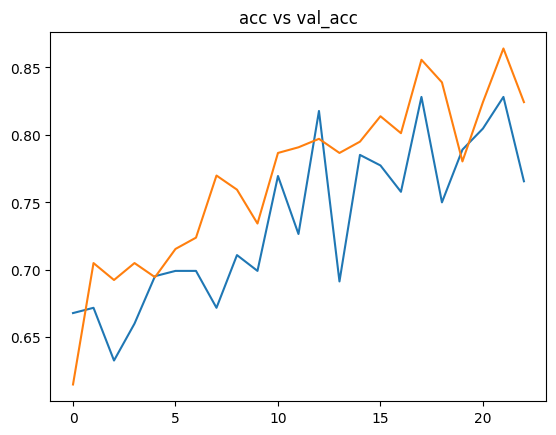

In [22]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title('acc vs val_acc')
plt.show()

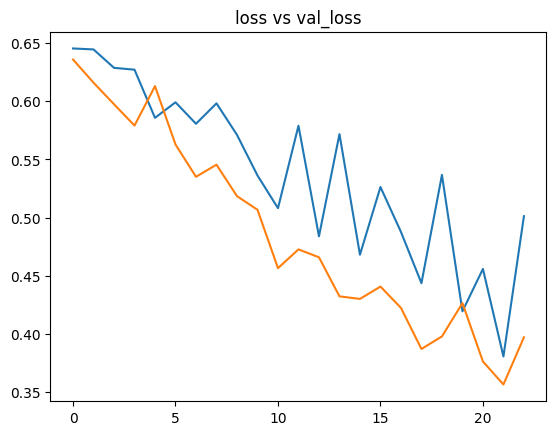

In [23]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title('loss vs val_loss')
plt.show()

In [24]:
# model accuracy

from keras.models import load_model

model = load_model('/content/bestmodel.keras')

# Model Accuracy

In [26]:
acc = model.evaluate(val_data)[1]
print(f'the accuracy of our model is {acc*100}%')

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8640 - loss: 0.3566
the accuracy of our model is 86.40167117118835%


In [29]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

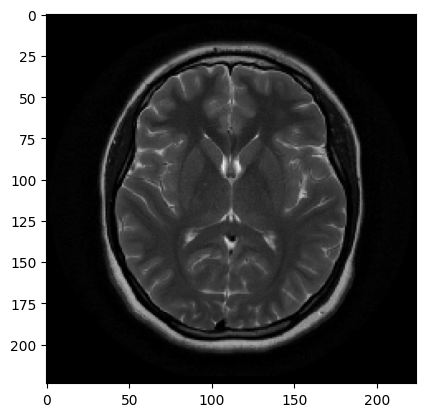

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
The image is not having Tumour


In [30]:
# Testing model's performance from one single image by using img path
path ='/content/train/Healthy/Not Cancer  (1).jpeg'

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
pred

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')

# Transfer Learning
## Our Model Accuracy is 93% which is fine, but not great
## So we need to do increase the model's accuracy

Image Preprocessing

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [32]:
def preprocessingImages(path): # Data Augmentation
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range= 0.2, preprocessing_function = preprocess_input, horizontal_flip = True) # Increasing dimension for deep pattern
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [33]:
def preprocessingImages2(path):
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(preprocessing_function = preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [34]:
path = '/content/train'
train_data = preprocessingImages(path)

Found 3264 images belonging to 2 classes.


In [35]:
path = '/content/test'
test_data = preprocessingImages2(path)

Found 0 images belonging to 1 classes.


In [36]:
path = '/content/val'
val_data = preprocessingImages2(path)

Found 478 images belonging to 2 classes.


### Model Training

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications import MobileNet
import keras

In [38]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
for layer in base_model.layers:
  layer.trainable = False

In [40]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation  = 'sigmoid')(X)
model = Model(base_model.input, X)

In [41]:
model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [42]:
model.compile(optimizer = 'rmsprop',
              loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [43]:
## call backs
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Model check point
mc = ModelCheckpoint(filepath = 'bestmodel.keras', monitor = 'val_accuracy', save_best_only = True)

# Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

cb = [mc,es]

In [44]:
hist = model.fit(train_data,
          steps_per_epoch=8,
          epochs = 30,
          validation_data = val_data,
          validation_steps = 16,
          callbacks = cb)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.5475 - loss: 7.9257

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6914 - loss: 5.7066 - val_accuracy: 0.8577 - val_loss: 1.3552
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 653ms/step - accuracy: 0.7500 - loss: 2.1714 - val_accuracy: 0.7971 - val_loss: 2.1853
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - accuracy: 0.8203 - loss: 1.4067 - val_accuracy: 0.6946 - val_loss: 2.9686
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 721ms/step - accuracy: 0.8711 - loss: 0.7898 - val_accuracy: 0.9247 - val_loss: 0.4525
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 0.7969 - loss: 1.7010 - val_accuracy: 0.9247 - val_loss: 0.4895
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 649ms/step - accuracy: 0.9141 - loss: 0.6552 - val_accuracy: 0.9226 - val_loss: 0.4123
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.8984 - loss: 0.9586 - val_accuracy: 0.9059 - val_loss: 0.7400
Epoch 7: early stopping


In [ ]:
# load best fit model

model = load_model('/content/drive/MyDrive/bestmodel.keras')

In [ ]:
acc = model.evaluate(test_data)[1]
print(f'model accuracy is {acc*100}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 402s 17s/step - accuracy: 0.9456 - loss: 0.5763
model accuracy is 95.85427045822144%


In [45]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

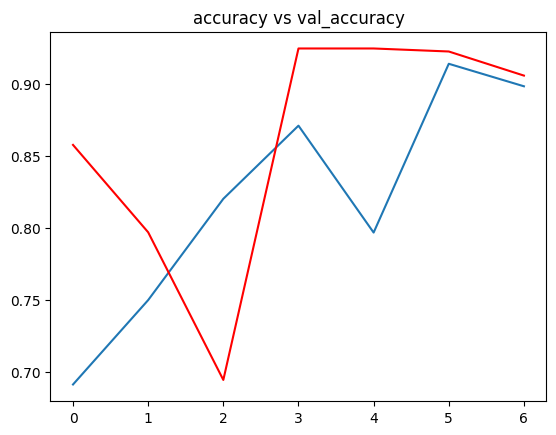

In [46]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = 'red')
plt.title('accuracy vs val_accuracy')
plt.show()

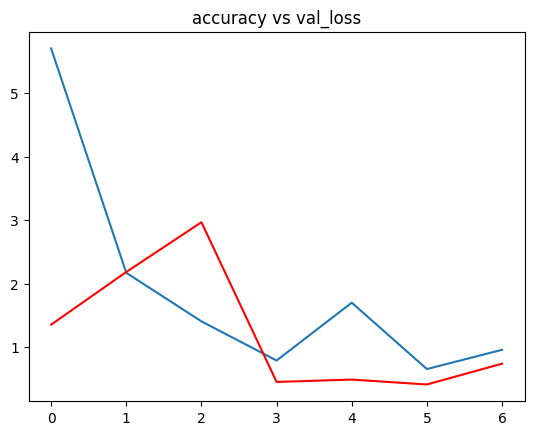

In [47]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = 'red')
plt.title('accuracy vs val_loss')
plt.show()

In [49]:
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


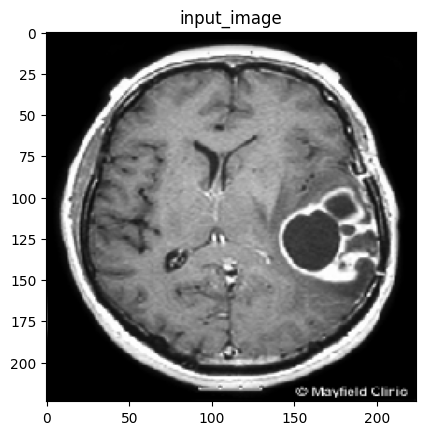

The image is having Tumour


In [51]:
# Testing model's performance from one single image by using img path
path ='/content/train/Brain Tumor/Cancer (1000).jpg'

img = image.load_img(path, target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])

input_arr.shape

pred = np.argmax(model.predict(input_arr)) #

#To display the image
plt.imshow(input_arr[0])
plt.title('input_image')
plt.show()

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


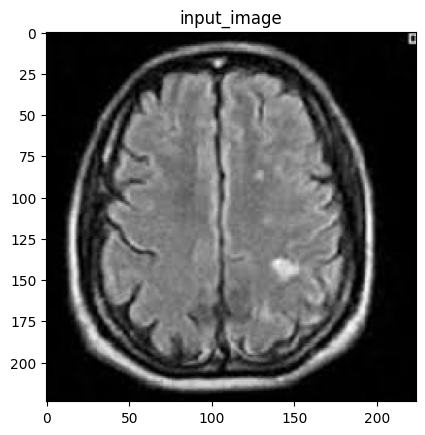

The image is having Tumour


In [54]:
# Testing model's performance from one single image by using img path
path ='/content/train/Healthy/Not Cancer  (1006).jpg'

img = image.load_img(path, target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])

input_arr.shape

pred = np.argmax(model.predict(input_arr)) #

#To display the image
plt.imshow(input_arr[0])
plt.title('input_image')
plt.show()

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')

In [57]:
img = image.load_img("/content/train/Brain Tumor/Cancer (1000).jpg", target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

predictions = model.predict(img_array)

# Print the predicted class and confidence
pred_class = np.argmax(predictions)
confidence = np.max(predictions)
print(f"Predicted Class: {pred_class}")
print(f"Confidence Score: {confidence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class: 0
Confidence Score: 4.4921755204541114e-10


# Streamlit Part

In [50]:
!pip install --upgrade streamlit
!pip show streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00
Name: streamlit
Version: 1.48.1
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 


In [74]:
def import_and_predict(image_data, model):
    # Open and preprocess the image
    image = Image.open(image_data).convert('RGB')
    image = ImageOps.fit(image, (224, 224), Image.Resampling.LANCZOS)
    img_array = np.array(image) / 255.0   # normalize
    input_arr = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Model prediction (sigmoid gives probability between 0 and 1)
    pred_prob = model.predict(input_arr)[0][0]

    # Apply threshold
    if pred_prob > 0.5:
        pred_class = 1   # No Tumor
    else:
        pred_class = 0   # Tumor

    return pred_class, pred_prob, img_array


In [75]:
# %%writefile app.py
# import streamlit as st
# import tensorflow as tf
# from PIL import Image, ImageOps
# import numpy as np
# import matplotlib.pyplot as plt

# @st.cache_resource
# def load_model():
#     model = tf.keras.models.load_model('/content/bestmodel.keras')
#     return model

# model = load_model()

# st.write('''
#           # Brain Tumor Detection
# ''')

# file = st.file_uploader('Upload your Brain MRI Image', type=['jpg', 'png'])

# def import_and_predict(image_data, model):
#     image = Image.open(image_data).convert('RGB')
#     image = ImageOps.fit(image, (224, 224), Image.Resampling.LANCZOS)
#     img_array = np.array(image) / 255.0
#     input_arr = np.expand_dims(img_array, axis=0)  # Add batch dimension

#     predictions = model.predict(input_arr)
#     pred_class = np.argmax(predictions)
#     return pred_class, img_array

# # if file is None:
# #     st.text('Please upload an image file')
# # else:
# #     pred, img_array = import_and_predict(file, model)

# #     if pred == 0:
# #         st.text('The image shows a Tumor')
# #     else:
# #         st.text('The image does not show a Tumor')

# #     # Display the uploaded image
# #     st.image(img_array, caption='Uploaded Image', use_container_width=True)

# # class_names = ["Brain Tumor", "Healthy"]

# # if file is None:
# #     st.text("Please upload an image file")
# # else:
# #     pred, img_array = import_and_predict(file, model)
# #     st.text(f"The image shows: {class_names[pred]}")
# #     st.image((img_array * 255).astype(np.uint8), caption="Uploaded Image", use_container_width=True)

# if file is None:
#     st.text("Please upload an image file")
# else:
#     pred, prob, img_array = import_and_predict(file, model)

#     if pred == 0:
#         st.text(f"The image shows a Tumor (Confidence: {1-prob:.2f})")
#     else:
#         st.text(f"The image does not show a Tumor (Confidence: {prob:.2f})")

#     # Show image
#     st.image(img_array, caption="Uploaded Image", use_container_width=True)


Overwriting app.py


In [77]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np

@st.cache_resource
def load_model():
    model = tf.keras.models.load_model('/content/bestmodel.keras')
    return model

model = load_model()

st.write('''
          # Brain Tumor Detection
''')

file = st.file_uploader('Upload your Brain MRI Image', type=['jpg', 'png'])

def import_and_predict(image_data, model):
    # Preprocess image
    image = Image.open(image_data).convert('RGB')
    image = ImageOps.fit(image, (224, 224), Image.Resampling.LANCZOS)
    img_array = np.array(image) / 255.0   # normalize
    input_arr = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict using sigmoid
    pred_prob = model.predict(input_arr)[0][0]

    # Threshold 0.5
    pred_class = 1 if pred_prob > 0.5 else 0

    return pred_class, pred_prob, img_array

if file is None:
    st.text('Please upload an image file')
else:
    pred, prob, img_array = import_and_predict(file, model)

    if pred == 0:
        st.text(f"shows a Tumor (Confidence: {1-prob:.2f})")
    else:
        st.text(f"Healthy (Confidence: {prob:.2f})")

    st.image(img_array, caption='Uploaded Image', use_container_width=True)


Overwriting app.py


In [64]:
!ngrok config add-authtoken 30y06aS09CrHLdHMts1Ip0TG3ro_7vpAv7SSNQ1h5HJdfHu3K

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [65]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [66]:
pip install --upgrade pyngrok

In [62]:
!ngrok disconnect --all

ERROR:  unknown flag: --all


In [ ]:
!ngrok kill

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080                        # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --domain mydomain.com                           # run ngrok with your own custom domain
  ngrok http 80 --allow-cidr 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions

In [67]:
from pyngrok import ngrok

# Ensure you are specifying the correct port
port = 8501
ngrok_tunnel = ngrok.connect(port, "http")
print("Streamlit app will be accessible at:", ngrok_tunnel.public_url)

Streamlit app will be accessible at: https://bb01e7f353aa.ngrok-free.app


In [ ]:
!cat /content/nohup.out




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.122.92.140:8501

2024-08-15 08:15:54.587998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 08:15:55.038479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 08:15:55.162659: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-15 08:15:55.323998: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To